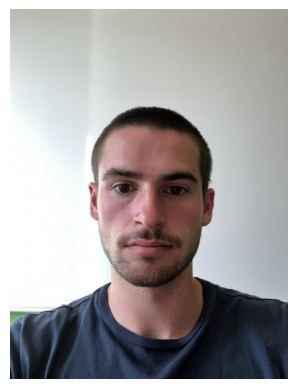

In [15]:
import numpy as np
import matplotlib
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Load the image
image_path = '/Users/benbaize/Desktop/CSCI507/IMG_5088.jpeg' 
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()



In [3]:
#Sobil Filter
sobil_vert_filter = np.array([((-1,-1,-1),(-2,-2,-2),(-1,-1,-1)),((0,0,0),(0,0,0),(0,0,0)),((1,1,1),(2,2,2),(1,1,1))])
#Load Image into Numpy Array
self_image = np.array(image)

In [135]:
print('Image Shape:',np.shape(self_image)) #Just seeing Dimensions
print('Values in top left pixel:', self_image[0][0]) #...
print('Sobile Filter: \n',sobil_vert_filter) #...

Image Shape: (1024, 768, 3)
Values in top left pixel: [186 189 182]
Sobile Filter: 
 [[[-1 -1 -1]
  [-2 -2 -2]
  [-1 -1 -1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  1  1]
  [ 2  2  2]
  [ 1  1  1]]]


In [118]:
#Function for applying filter to image
def filter(image_array,filter):

    filtered_image = np.empty([np.shape(image_array)[0],np.shape(image_array)[1],3]) #Initialize empty new image of same size

    for i in range(1, np.shape(image_array)[0]-1):  
        for j in range(1, np.shape(image_array)[1]-1):
            # 3x3 window applying filter to
            px_grid = np.array([
                [image_array[i-1, j-1], image_array[i, j-1], image_array[i+1, j-1]],
                [image_array[i-1, j],   image_array[i, j],   image_array[i+1, j]],
                [image_array[i-1, j+1], image_array[i, j+1], image_array[i+1, j+1]]
            ])
            #Applying filter to windowed section
            new_px = np.sum(px_grid*filter)
            #Putting filtered Pixel into new image 
            filtered_image[i, j] = new_px
    return filtered_image

In [119]:
sobil_vert_filtered = filter(self_image,sobil_vert_filter)

In [133]:
print('Image Shape:', np.shape(sobil_vert_filtered)) #Testing sizes again
# print(np.shape(px_grid))
print('Shape of Sobil Filter:',np.shape(sobil_vert_filter)) # ...

Image Shape: (1024, 768, 3)
Shape of Sobil Filter: (3, 3, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


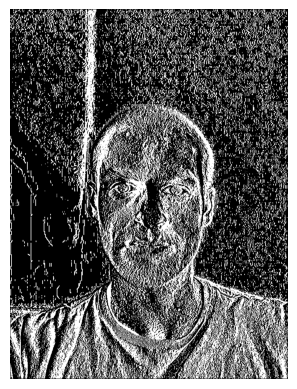

In [121]:
plt.imshow(sobil_vert_filtered)
plt.axis('off')
plt.show()

/var/folders/9b/x2ln5s1x0x97knwyr1569h3r0000gn/T/ipykernel_72982/1723083599.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  grayscale_self_image = grayscale_self_image.resize((200, 400), Image.ANTIALIAS)


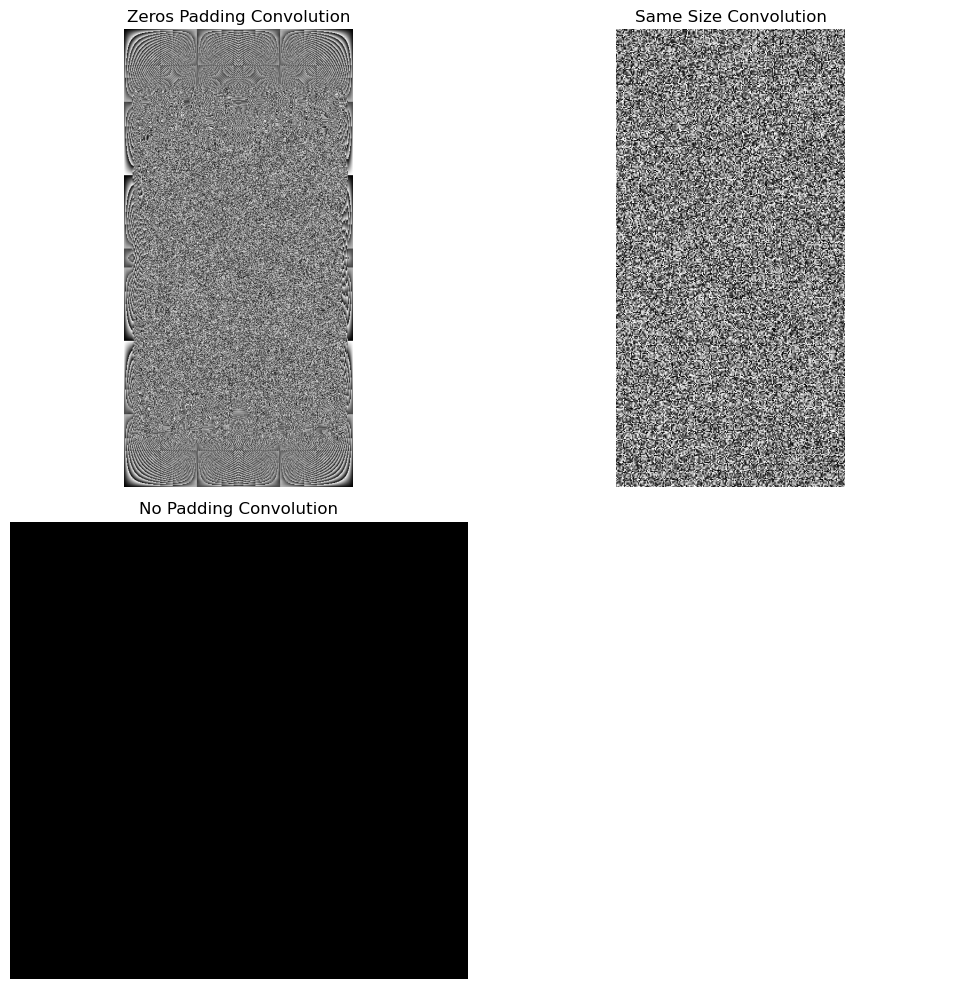

In [125]:
from scipy.signal import convolve2d

#Convolve image with self, zeros padding, same size output, no padding
grayscale_self_image = image.convert('L')
grayscale_self_image = grayscale_self_image.resize((200, 400), Image.ANTIALIAS)
grayscale_self_image = np.array(grayscale_self_image)

zeros_convolve = convolve2d(grayscale_self_image, grayscale_self_image, mode='full')
samesz_convolve = convolve2d(grayscale_self_image, grayscale_self_image, mode='same')
nopad_convolve = convolve2d(grayscale_self_image, grayscale_self_image, mode='valid')

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(zeros_convolve, cmap='gray')
axs[0, 0].set_title('Zeros Padding Convolution')
axs[0, 0].axis('off')  # Hide the axes

axs[0, 1].imshow(samesz_convolve, cmap='gray')
axs[0, 1].set_title('Same Size Convolution')
axs[0, 1].axis('off')  # Hide the axes

axs[1, 0].imshow(nopad_convolve, cmap='gray')
axs[1, 0].set_title('No Padding Convolution')
axs[1, 0].axis('off')  # Hide the axes

# The fourth subplot (bottom right) can be left empty or used for something else
axs[1, 1].axis('off')  # Hide the axes of the empty subplot

# Adjust layout to make sure titles and labels fit well
plt.tight_layout()

# Show the plot
plt.show()

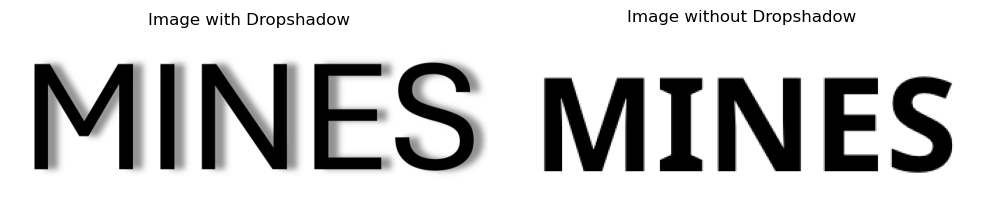

In [137]:
#Create Mines with dropshadow
dropshadow_mines_image_path = '/Users/benbaize/Desktop/CSCI507/Screenshot 2024-08-31 at 11.18.08 AM.png' 
dropshadow_mines = Image.open(dropshadow_mines_image_path)
mines_image_path = '/Users/benbaize/Desktop/CSCI507/Mines.jpeg'
mines = Image.open(mines_image_path)
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].imshow(dropshadow_mines)
axs[0].set_title('Image with Dropshadow')
axs[0].axis('off') 

axs[1].imshow(mines,cmap='gray')
axs[1].set_title('Image without Dropshadow')
axs[1].axis('off')  # Hide the axes of the empty subplot

# Adjust layout to make sure titles and labels fit well
plt.tight_layout()

# Show the plot
plt.show()


In [140]:
dropshadow_mines = np.array(dropshadow_mines)
print('Original Shape:',np.shape(dropshadow_mines))
dropshadow_reduced_array = dropshadow_mines[:, :, :3] # Removing 4th dimension in the 3rd axis
print('Reduced Shape:',np.shape(dropshadow_reduced_array))

#non dropshadow reduction

mines = np.array(mines)
reduced_mines = mines[:,:,:3]

Original Shape: (276, 766, 4)
Reduced Shape: (276, 766, 3)


In [148]:
# Define the Gaussian kernel parameters
sigma = 0.5  # Standard deviation
kernel_size = 3  # Example kernel size, can be any integer

# Initialize the Gaussian filter with the shape (kernel_size, kernel_size)
gaussian_filter = np.zeros((kernel_size, kernel_size))

# Fill the Gaussian filter with values using the Gaussian equation
for x in range(0, np.shape(gaussian_filter)[1]):
    for y in range(0, np.shape(gaussian_filter)[0]):
        gaussian_filter[x][y] = (1 / (2 * np.pi * sigma**2)) * np.exp(-(((x + 1)**2) + ((y + 1)**2)) / (2 * sigma**2))

gaussian_filter_3d = np.repeat(gaussian_filter[:, :, np.newaxis], 3, axis=2) #making it apply to all colors

print('Gaussian Filter Size:', gaussian_filter_3d.shape)

print('Gaussian Filter: \n', gaussian_filter_3d)

Gaussian Filter Size: (3, 3, 3)
Gaussian Filter: 
 [[[1.16600979e-02 1.16600979e-02 1.16600979e-02]
  [2.89024930e-05 2.89024930e-05 2.89024930e-05]
  [1.31217115e-09 1.31217115e-09 1.31217115e-09]]

 [[2.89024930e-05 2.89024930e-05 2.89024930e-05]
  [7.16421173e-08 7.16421173e-08 7.16421173e-08]
  [3.25254709e-12 3.25254709e-12 3.25254709e-12]]

 [[1.31217115e-09 1.31217115e-09 1.31217115e-09]
  [3.25254709e-12 3.25254709e-12 3.25254709e-12]
  [1.47665410e-16 1.47665410e-16 1.47665410e-16]]]


In [149]:
dropshadow_gaussian_blurred_image = filter(dropshadow_reduced_array,gaussian_filter)
gaussian_blurred_image = filter(reduced_mines,gaussian_filter)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


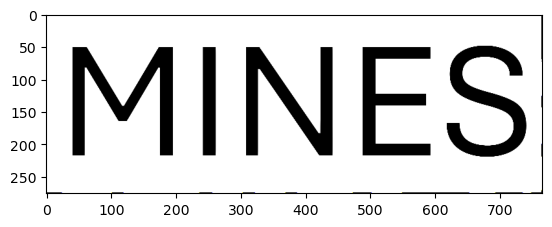

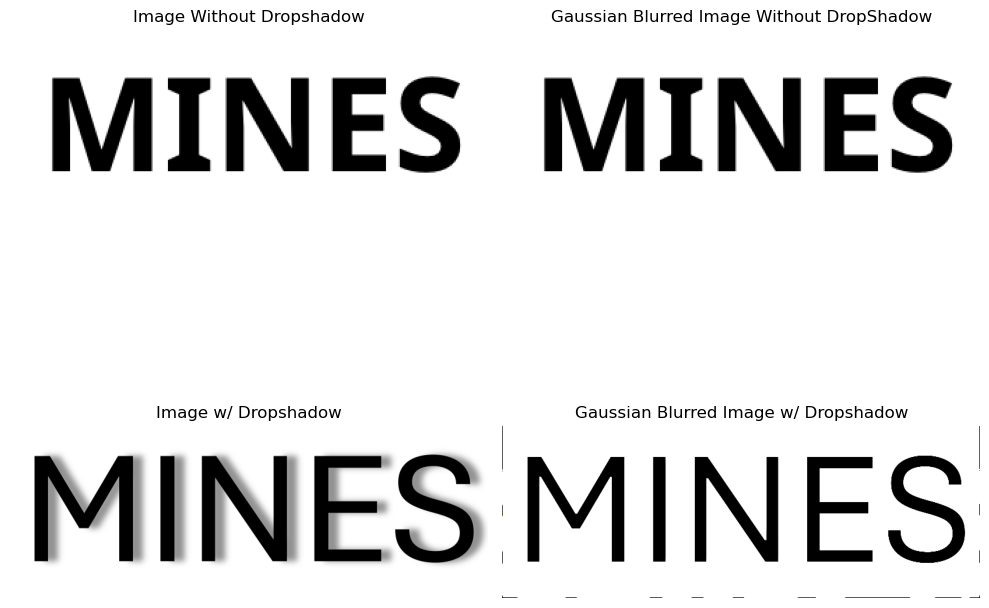

In [150]:
plt.imshow(dropshadow_gaussian_blurred_image)
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(mines, cmap='gray')
axs[0, 0].set_title('Image Without Dropshadow')
axs[0, 0].axis('off')  # Hide the axes

axs[0, 1].imshow(reduced_mines, cmap='gray')
axs[0, 1].set_title('Gaussian Blurred Image Without DropShadow')
axs[0, 1].axis('off')  # Hide the axes

axs[1, 0].imshow(dropshadow_mines, cmap='gray')
axs[1, 0].set_title('Image w/ Dropshadow')
axs[1, 0].axis('off')  # Hide the axes

# The fourth subplot (bottom right) can be left empty or used for something else
axs[1,1].imshow(dropshadow_gaussian_blurred_image,cmap='gray')
axs[1,1].set_title('Gaussian Blurred Image w/ Dropshadow')
axs[1, 1].axis('off')  # Hide the axes of the empty subplot

# Adjust layout to make sure titles and labels fit well
plt.tight_layout()

# Show the plot
plt.show()